# Appling some sklearn classifiers

In [1]:
import pandas as pd
import numpy as np
import sklearn

## Read data

This data contains information from clients in a bank. They are classified in two categories if they are good or bad to conceal them a credit 

In [2]:
data = pd.read_table("../data/german.data", delimiter=' ', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## Split better train and test

In [4]:
splitFactor = 0.8
trainSize   = int(splitFactor * len(data))
train       = data.iloc[:trainSize,[1,12,7,15,17]]
trainTarget = data.iloc[:trainSize,20]

test        = data.iloc[trainSize:,[1,12,7,15,17]]
testTarget  = data.iloc[trainSize:,20]
print("len of train is {}\nlen of test  is {}".format(len(train), len(test)))

len of train is 800
len of test  is 200


## Create Dictionary of accuracies

In [5]:
modelsAccuracy = {}

## Naive bayes gaussian

In [6]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
data_selected = data.iloc[:,[1,12,7,15,17]]
target        = data.iloc[:,20]
model         = gnb.fit(train, trainTarget)
predicted     = model.predict(test)
print("Number of mislabeled points out of a total %d points : %d"
      % (test.shape[0],(testTarget != predicted).sum()))
accuracy = (testTarget == predicted).sum() / len(predicted)
modelsAccuracy["NaiveBayes"] = accuracy

Number of mislabeled points out of a total 200 points : 55


## K nearest neighbors

In [7]:
from sklearn.neighbors import KNeighborsClassifier
maxK = 10
accuraciesList = np.zeros(maxK)
for k in range(1,maxK+1):
    knn = KNeighborsClassifier(k)
    
    knn_model = knn.fit(train, trainTarget)
    predicted = knn_model.predict(test)
    
    accuracy = (testTarget == predicted).sum() / len(predicted)
    accuraciesList[k-1] = accuracy
    print("For %d neighbours theb number of mislabeled points out of a total %d points : %d"
          % (k,test.shape[0],(testTarget != predicted).sum()))

accuracy = accuraciesList.min()
print(accuracy)
modelsAccuracy["Kneigbors"] = accuracy

For 1 neighbours theb number of mislabeled points out of a total 200 points : 81
For 2 neighbours theb number of mislabeled points out of a total 200 points : 66
For 3 neighbours theb number of mislabeled points out of a total 200 points : 69
For 4 neighbours theb number of mislabeled points out of a total 200 points : 63
For 5 neighbours theb number of mislabeled points out of a total 200 points : 66
For 6 neighbours theb number of mislabeled points out of a total 200 points : 65
For 7 neighbours theb number of mislabeled points out of a total 200 points : 69
For 8 neighbours theb number of mislabeled points out of a total 200 points : 63
For 9 neighbours theb number of mislabeled points out of a total 200 points : 64
For 10 neighbours theb number of mislabeled points out of a total 200 points : 60
0.595


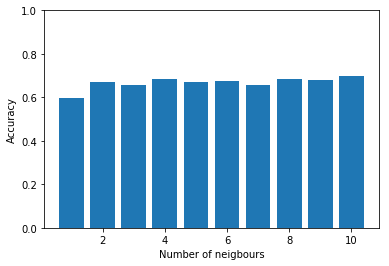

In [8]:
import matplotlib.pyplot as plt

plt.bar(np.arange(1,maxK+1), accuraciesList)
plt.ylim(ymax=1)
plt.xlabel('Number of neigbours')
plt.ylabel('Accuracy')

plt.show()

In [9]:
from sklearn.model_selection import cross_val_score

knn    = KNeighborsClassifier(5)
scores = cross_val_score(knn, data.iloc[:,[1,12,7,15,17]], data.iloc[:,20], cv=10)
scores

array([0.74, 0.66, 0.66, 0.64, 0.67, 0.64, 0.58, 0.7 , 0.68, 0.64])

In [10]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.08)


add f1 testing and explain why is more useful. In case of imbalanced classes 99% of people does not have the desease accuracy
fails to be a useful metric to mesure the correctness of a model. F1 score is more robust for this cases. It uses 
recall and accuracy. So it is better to go for this metric chosing which model to use.


In [11]:
scores = cross_val_score(knn, data.iloc[:,[1,12,7,15,17]], data.iloc[:,20], cv=10, scoring='f1_macro')
print("F1_score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

F1_score: 0.54 (+/- 0.11)


## Support Vector Machines

In [12]:
from sklearn.svm import SVC
svc = SVC()
# svc.fit(train, trainTarget)
scores = cross_val_score(svc, data.iloc[:,[1,12,7,15,17]], data.iloc[:,20], cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
modelsAccuracy["SVM"] = scores.mean()

Accuracy: 0.69 (+/- 0.05)


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train, trainTarget)
predicted = rf.predict(test)
print("Number of mislabeled points out of a total %d points : %d"
      % (test.shape[0],(testTarget != predicted).sum()))
accuracy = (testTarget == predicted).sum() / len(predicted)
modelsAccuracy["RandomForest"] = accuracy

Number of mislabeled points out of a total 200 points : 68


## AdaBoost 

In [14]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(train, trainTarget)
predicted = ada.predict(test)
print("Number of mislabeled points out of a total %d points : %d"
      % (test.shape[0],(testTarget != predicted).sum()))
accuracy = (testTarget == predicted).sum() / len(predicted)
modelsAccuracy["AdaBoost"] = accuracy

Number of mislabeled points out of a total 200 points : 56


## Multi Layer Perceptron

In [15]:
from sklearn.neural_network import MLPClassifier
ada = MLPClassifier()
ada.fit(train, trainTarget)
predicted = ada.predict(test)
print("Number of mislabeled points out of a total %d points : %d"
      % (test.shape[0],(testTarget != predicted).sum()))
accuracy = (testTarget == predicted).sum() / len(predicted)
modelsAccuracy["MLP"] = accuracy

Number of mislabeled points out of a total 200 points : 53


In [16]:
print(modelsAccuracy)

{'NaiveBayes': 0.725, 'Kneigbors': 0.595, 'SVM': 0.693, 'RandomForest': 0.66, 'AdaBoost': 0.72, 'MLP': 0.735}


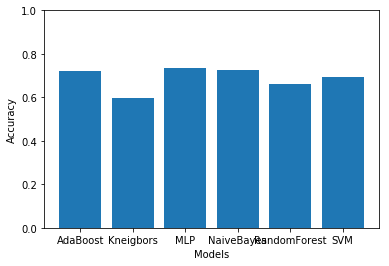

In [21]:
import matplotlib.pyplot as plt

plt.bar(modelsAccuracy.keys(), modelsAccuracy.values())
plt.ylim(ymax=1)
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()